# Surviving the teenage years without smoking marijuana

Data collected from: https://www.datafiles.samhsa.gov/dataset/national-survey-drug-use-and-health-2015-nsduh-2015-ds0001

And are documented here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/NSDUH-2015/NSDUH-2015-datasets/NSDUH-2015-DS0001/NSDUH-2015-DS0001-info/NSDUH-2015-DS0001-info-codebook.pdf

## Importing Data

In [1]:
import pandas as pd, os, numpy as np
        
cols =  [#Acohol habits
        {'col' : 'ALCTRY', 'Description' : 'Age when tried alcohol', },
        #Cigaret habits
        {'col' : 'CIGAGE', 'Description' : 'Age when smoked cigaret everyday', },
        {'col' : 'CIGTRY', 'Description' : 'Age when tried cigaret', },
        #Mariuana
        {'col' : 'MJAGE', 'Description' : 'Age when used Mariuana'},
        #Demographics
        {'col' : 'AGE2', 'Description' : 'Age',},
        {'col' : 'IRFAMSOC', 'Description' : 'Family receives social security payments,1=Y, 2=N',},
        {'col' : 'IRFAMSSI', 'Description' : 'Family receives Supplemental Security Income, 1=Y, 2=N',},
        {'col' : 'IRFAMIN3', 'Description' : 'Family income grouped',},
        {'col' : 'PDEN10', 'Description' : 'County with 2=Less than 1 mio people, 1=More than 1 mio people, 3=Segment out of CBSA', },
        #Youth Experiences
        {'col' : 'YEPGDJOB', 'Description' : 'How often your parents told you that you have done a good job,'},
        #Religion
        {'col' : 'SNRLGIMP', 'Description' : 'How important is religion to your life?'},]

raw=pd.read_csv(os.path.join('Datasets', 'NSDUH_2015_Tab.tsv'), sep='\t',usecols=[item['col'] for item in cols])

## Feature explanations

* __ALCTRY__: Age when tried alcohol 
    * RANGE: 1-71 (Age)
    * \>900: Never used alcohol
* __CIGTRY__: Age when tried cigaret 
    * RANGE: 1-62 (Age)
    * \>900: Never tried a cigaret
* __CIGAGE__: Age when smoked cigaret everyday 
    * RANGE: 1-61 (Age)
    * \>900: Never tried a cigaret
* __MJAGE__: Age when used Mariuana
    * RANGE: 1-78 (Age)
    * \>900: Never used marijuana
* __AGE2__: Age
    * RANGE: 1-7 (Age - 11 years)
    * \>7 : Older than 18 years
* __IRFAMSOC__: Family receives social security payments1=Y 2=N
    * 1: Yes, 2: No
* __IRFAMSSI__: Family receives Supplemental Security Income 1=Y 2=N
    * 1: Yes, 2: No
* __IRFAMIN3__: Family income grouped
    * 1: \>10k USD, 2: 10k-20k USD, 3: 20k-30k USD, 4: 30k-40k USD, 5: 40k-50k USD, 6: 50k-75k USD, 7 \>75k USD 
* __PDEN10__: Size of city
    * County with 2=Less than 1 mio people 1=More than 1 mio people 3=Segment out of CBSA 
* __YEPGDJOB__: How often your parents tell you that you've done a good job? (Assumption: If now, then probably always)
    * 1: Always, 2: Sometimes, 3: Seldom, 4: Never
* __SNRLGIMP__: My religious beliefs are important to me (Assumption: If now, then probably always)
    * 1: Strongly disagree, 2: Disagree, 3: Agree, 4: Strongly Agree

### Features

In [2]:
df = raw[raw['AGE2'] == 6].copy().reset_index(drop=True)

#Age
df['AGE'] = df['AGE2'] + 11

#Age columns with right-censoring
for c in ['ALCTRY', 'CIGTRY','CIGAGE', 'MJAGE']:
    df[c] = df[c].apply(lambda x: np.nan if x > 100 else x)
    
#Boolean columns
for c in ['IRFAMSOC', 'IRFAMSSI']:
    df[c] = df[c].apply(lambda x: 0 if not x == 1 else 1)

#Legitimate skips of religion questions (Assuming mean)
df['YEPGDJOB'] = df['YEPGDJOB'].apply(lambda x: x if x < 5 else 2)

In [3]:
len(df.index)

2260

### Understanding the data

#### Demographics

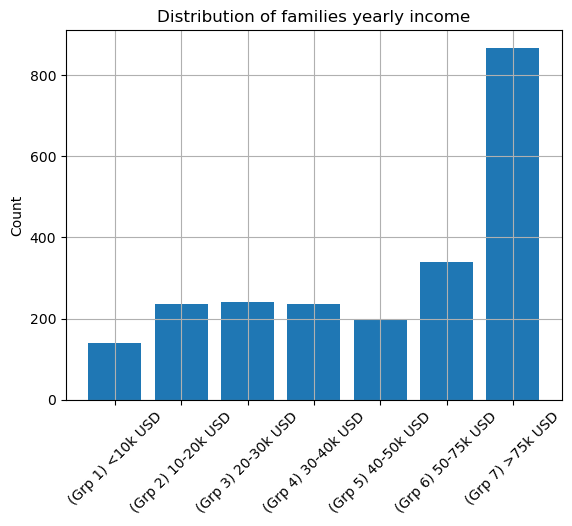

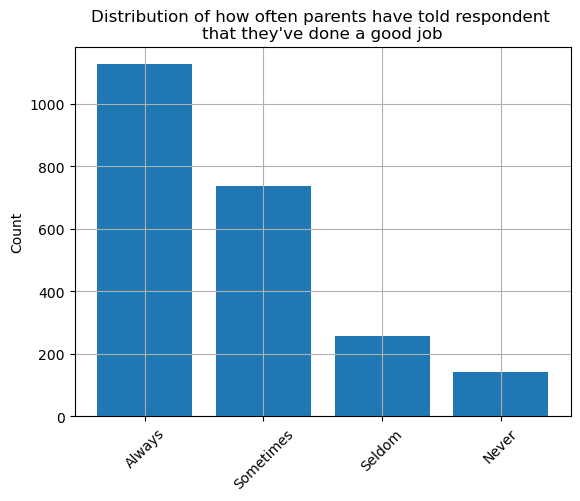

In [4]:
import matplotlib.pyplot as plt
#Family income
fig, ax = plt.subplots()
labels, counts = np.unique(df['IRFAMIN3'].values, return_counts=True)
ax.bar(labels, counts, align='center')
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['(Grp 1) <10k USD','(Grp 2) 10-20k USD','(Grp 3) 20-30k USD','(Grp 4) 30-40k USD','(Grp 5) 40-50k USD','(Grp 6) 50-75k USD','(Grp 7) >75k USD'],rotation=45)
ax.set_title("Distribution of families yearly income")
ax.set_ylabel("Count")
plt.grid()
plt.show()
fig.savefig("figs//DistributionFamiliesYearlyIncome.pdf", format="pdf", bbox_inches="tight")

#Parents tell you've done a good job
fig, ax = plt.subplots()
labels, counts = np.unique(df['YEPGDJOB'].values, return_counts=True)
ax.bar(labels, counts, align='center')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Always','Sometimes','Seldom','Never'],rotation=45)
ax.set_title("Distribution of how often parents have told respondent \nthat they've done a good job")
ax.set_ylabel("Count")
plt.grid()
plt.show()
fig.savefig("figs//DistributionParentsTellGoodJob.pdf", format="pdf", bbox_inches="tight")


#### Abuse onset

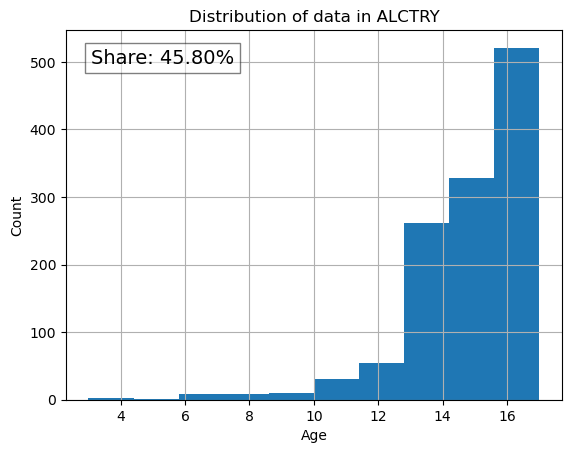

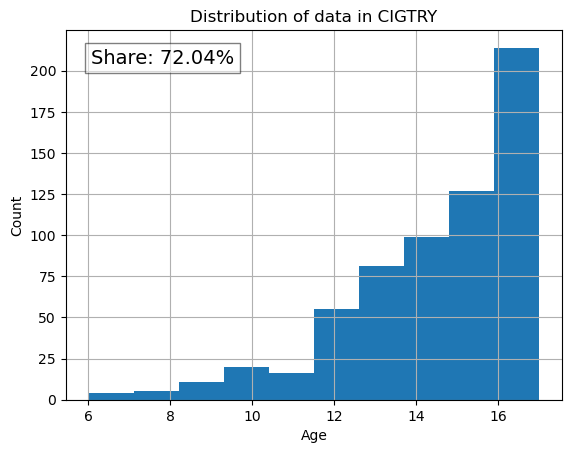

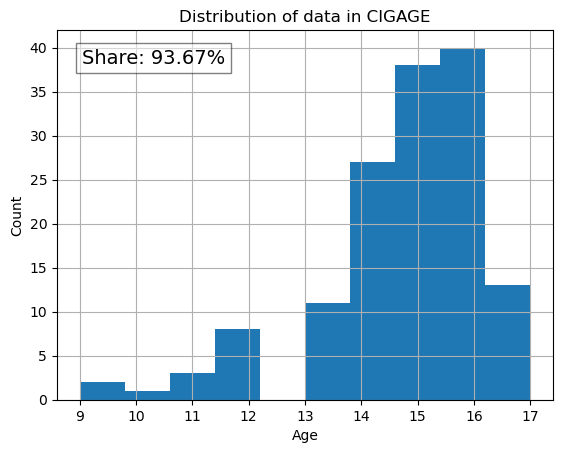

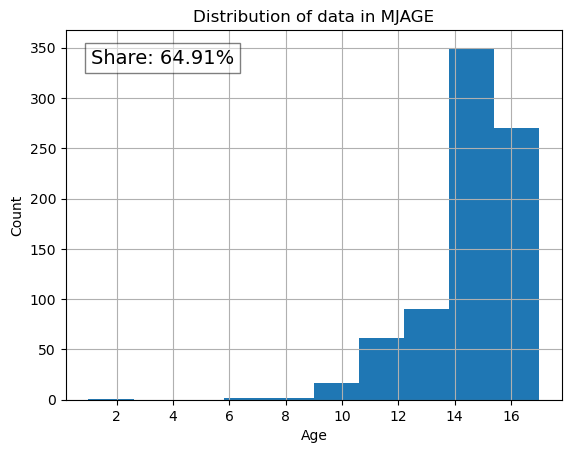

In [5]:
for c in ['ALCTRY', 'CIGTRY','CIGAGE', 'MJAGE']:
    fig, ax = plt.subplots()
    ax.hist(df[~np.isnan(df[c])][c])
    
    props = dict(boxstyle='square', facecolor='white', alpha=0.5)
    censoringShare = df[c].isna().sum()/len(df[c].index)
    ax.text(0.05, 0.95, f"Share: {censoringShare*100:.2f}%", transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    
    ax.set_title(f"Distribution of data in {c}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Count")
    plt.grid()
    fig.savefig(f"figs//Distribution{c}.pdf", format="pdf", bbox_inches="tight")

# Kaplan Meier Estimator

## Overall survival estimate

In [6]:
from lifelines import exceptions
import warnings

# Filter out the ApproximationWarning
warnings.filterwarnings("ignore", category=exceptions.ApproximationWarning)


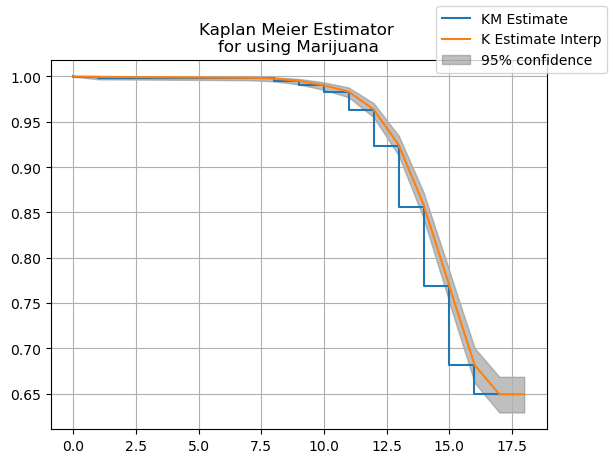

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
dur = df.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
event_obs = df.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)

kmf.fit(durations=dur, event_observed=event_obs)

k = pd.concat([kmf.confidence_interval_survival_function_, kmf.survival_function_],axis=1)
k_i = pd.DataFrame().reindex(index=np.arange(0, 18,0.01))
k_int = pd.concat([k, k_i]).sort_index().interpolate(method='linear')

fig, ax = plt.subplots()
ax.step(k.index,k['KM_estimate'],label="KM Estimate")
ax.plot(k_int.index, k_int['KM_estimate'],label="K Estimate Interp")
ax.fill_between(k_int.index, k_int['KM_estimate_lower_0.95'], k_int['KM_estimate_upper_0.95'], color='grey',alpha=0.5,label="95% confidence")
ax.set_title("Kaplan Meier Estimator \nfor using Marijuana")
fig.legend()
plt.grid()
fig.savefig("KME_FirstUse.pdf", bbox_inches='tight')

## For each income group

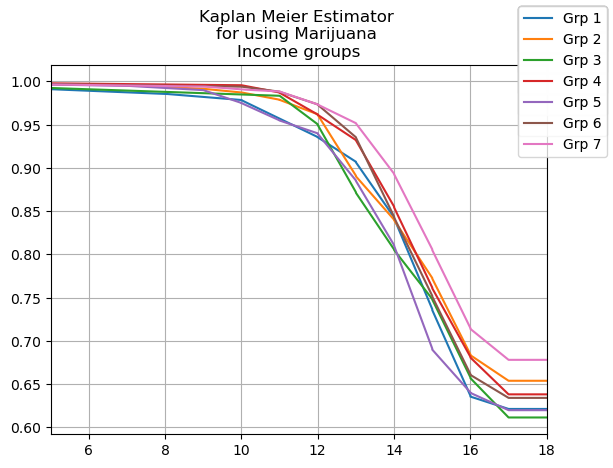

In [8]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots()

for n,g in df.groupby('IRFAMIN3'):
    dur = g.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
    event_obs = g.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
    kmf.fit(durations=dur, event_observed=event_obs)
    
    k = pd.concat([kmf.confidence_interval_survival_function_, kmf.survival_function_],axis=1)
    k_i = pd.DataFrame().reindex(index=np.arange(0, 18,0.01))
    k_int = pd.concat([k, k_i]).sort_index().interpolate(method='linear')
    
    ax.plot(k_int.index, k_int['KM_estimate'],label=f"Grp {n}")
    ax.set_title("Kaplan Meier Estimator \nfor using Marijuana \nIncome groups")
    ax.set_xlim([5,18])
    fig.legend()
    plt.grid()
fig.savefig("KME_IncomeGroup.pdf", bbox_inches='tight')

## For social security payment

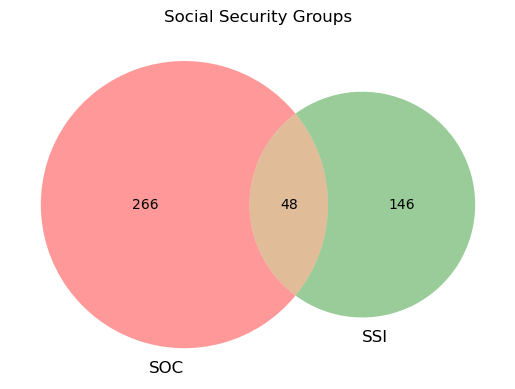

In [9]:
from matplotlib_venn import venn2 

SOCCount = df['IRFAMSOC'].sum()
SSICount = df['IRFAMSSI'].sum()
SOCSSIOverlap = df[(df['IRFAMSOC'] == 1) & (df['IRFAMSSI'] == 1)]['AGE'].count()

fig, ax = plt.subplots()
venn2(subsets = (SOCCount, SSICount, SOCSSIOverlap), set_labels = ('SOC', 'SSI'),ax=ax)
ax.set_title("Social Security Groups")

fig.savefig("figs//SOCGroupsVennDiagram.pdf", format="pdf", bbox_inches="tight")

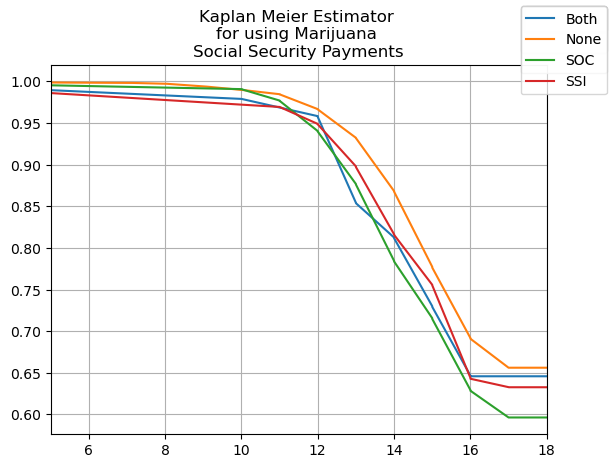

In [10]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots()

df['FAMSOCANY'] = "None"
df.loc[df['IRFAMSOC']==1,'FAMSOCANY'] = 'SOC'
df.loc[df['IRFAMSSI']==1,'FAMSOCANY'] = 'SSI'
df.loc[(df['IRFAMSOC']==1) & (df['IRFAMSSI']==1),'FAMSOCANY'] = 'Both'

for n,g in df.groupby('FAMSOCANY'):
    dur = g.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
    event_obs = g.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
    kmf.fit(durations=dur, event_observed=event_obs)
    
    k = pd.concat([kmf.confidence_interval_survival_function_, kmf.survival_function_],axis=1)
    k_i = pd.DataFrame().reindex(index=np.arange(0, 18,0.01))
    k_int = pd.concat([k, k_i]).sort_index().interpolate(method='linear')
    
    ax.plot(k_int.index, k_int['KM_estimate'],label=f"{n}")
    ax.set_title("Kaplan Meier Estimator \nfor using Marijuana \nSocial Security Payments")
    ax.set_xlim([5,18])
    fig.legend()

plt.grid()
fig.savefig("KME_SocialSecurityPayments.pdf", bbox_inches='tight')

# Log Rank Tests For Income Groups

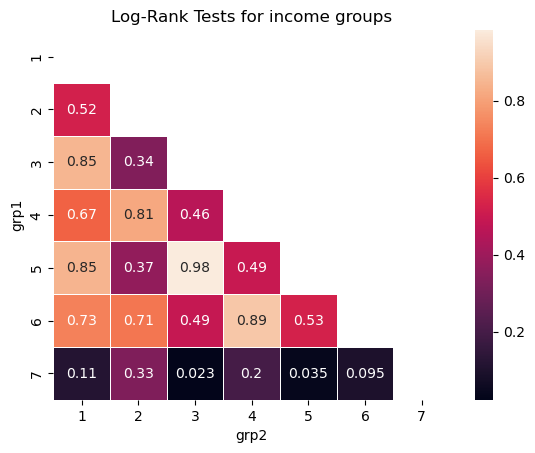

In [11]:
from lifelines.statistics import logrank_test
import seaborn as sns

lg = []

for n1, g1 in df.groupby('IRFAMIN3'):
    for n2, g2 in df.groupby('IRFAMIN3'):
        if n1 == n2: 
            continue
        dur1 = g1.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
        dur2 = g2.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
        
        event_obs1 = g1.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
        event_obs2 = g2.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
        
        LG = logrank_test( durations_A = dur1, durations_B = dur2,event_observed_A = event_obs1, event_observed_B = event_obs2 ).p_value
        
        lg.append({'col' : c, 'grp1' : n1, 'grp2' : n2, 'lg' : LG})
        
fig, ax = plt.subplots()
lgd = pd.pivot_table(pd.DataFrame(lg),index=['grp1'], columns=['grp2'], values='lg')
mask = np.triu(np.ones_like(lgd, dtype=bool))
sns.heatmap(lgd, annot=True, linewidths=.5, ax = ax,fmt='.2g', mask=mask)
ax.set_title(f"Log-Rank Tests for income groups")
plt.show()

fig.savefig("LogRankTestHeatMap.pdf", bbox_inches='tight')

# Cox proportional hazard model

To determine how the independent variables: CIGTRY, CIGAGE, IRFAMSOC, IRFAMSSI and PDEN10 affects the dependent variable MJAGE

COX hazard model shows the risk of starting to smoke marijuana at certain ages and is expressed as:
$$ h(t)=h_0(t)×exp(b_1x_1+b_2x_2+...+b_px_p) $$

* t is survival time
* h(t) is risk of starting to smoke MJ at age t
* b's represent impact/feature importance of covariates
* h_0 is the baseline hazard (risk if all covariates is zero) 

The quantity $$exp(b_i)$$ is the hazard ratio (HR), where:
* HR = 1: No effect
* HR < 1: Reduction in hazard 
* HR > 1: Increase in hazard

## Feature design

### Relationships between censored covariates and dependent variable

Covariates:
* Ages (ALCTRY, CIGTRY, CIGAGE): 
    * For each feature, we will make a feature describing whether the event has (0) not happende prior to the age of picking up marijuana or (1) has happened. 
* Remaining covariates are kept as is:
    * Family receives social security payments (__IRFAMSOC__):
    * Family receives Supplemental Security Income (__IRFAMSSI__): 
    * Family Income group (__IRFAMIN3__): 
    * Size of city (__PDEN10__): 
    * How often you are told that you are doing a good job (__YEPGDJOB__): 

Dependent Variable: Age when used Mariuana: (__MJAGE__)

In [12]:
df['MJAGE_DUR'] = df.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'], axis=1)
df['MJAGE_OBS'] = df.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0, axis=1)

for c in ['ALCTRY', 'CIGTRY', 'CIGAGE']:
    df[c+'_P'] = df.apply(lambda x: 18-x[c] if x[c] <= x['MJAGE_DUR'] else 0,axis=1)

In [13]:
df

,CIGTRY,CIGAGE,ALCTRY,MJAGE,SNRLGIMP,YEPGDJOB,AGE2,IRFAMSOC,IRFAMSSI,IRFAMIN3,PDEN10,AGE,FAMSOCANY,MJAGE_DUR,MJAGE_OBS,ALCTRY_P,CIGTRY_P,CIGAGE_P
0,16.0,NaN,15.0,NaN,99,2,6,0,0,1,3,17,None,17.0,0,3.0,2.0,0.0
1,NaN,NaN,15.0,NaN,99,1,6,0,0,7,1,17,None,17.0,0,3.0,0.0,0.0
2,NaN,NaN,15.0,15.0,99,1,6,0,0,2,1,17,None,15.0,1,3.0,0.0,0.0
3,16.0,NaN,14.0,14.0,99,2,6,0,0,7,2,17,None,14.0,1,4.0,0.0,0.0
4,NaN,NaN,16.0,17.0,99,1,6,1,0,5,3,17,SOC,17.0,1,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,NaN,NaN,15.0,15.0,99,1,6,0,0,6,1,17,None,15.0,1,3.0,0.0,0.0
2256,NaN,NaN,NaN,NaN,99,2,6,0,0,4,2,17,None,17.0,0,0.0,0.0,0.0
2257,NaN,NaN,NaN,NaN,99,4,6,0,0,7,2,17,None,17.0,0,0.0,0.0,0.0
2258,NaN,NaN,NaN,NaN,99,4,6,0,0,7,1,17,None,17.0,0,0.0,0.0,0.0


### Assumption
We assume that a one-unit increase in $$x_{ij}$$ corresponds to an increase in $$h(t|x_{i})$$ by a factor of $$exp(\beta_{j})$$

So we need to see if that assumption holds (Later)

### Features

In [14]:
cph_cols = ['IRFAMSOC', 'IRFAMSSI', 'IRFAMIN3', 'PDEN10', 'YEPGDJOB', 'MJAGE_DUR', 'MJAGE_OBS'] + [c for c in df.columns if '_P' in c]

In [15]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df[cph_cols], duration_col = 'MJAGE_DUR', event_col = 'MJAGE_OBS')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2260 total observations, 1467 right-censored observations>
             duration col = 'MJAGE_DUR'
                event col = 'MJAGE_OBS'
      baseline estimation = breslow
   number of observations = 2260
number of events observed = 793
   partial log-likelihood = -5767.34
         time fit was run = 2023-04-11 07:59:39 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
IRFAMSOC    0.16       1.17       0.11            -0.05             0.37                 0.95                 1.45
IRFAMSSI    0.02       1.02       0.15            -0.28             0.31                 0.76                 1.36
IRFAMIN3   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
PDEN10     -0.12       0.89       0.06            -0.23            -0.01                 0.80                 0.99
YEPGDJOB    0.14       1.15       0.04             0.07             0.21                 1.07                 1.24
ALCTRY_P    0.14       1.15       0.01             0.11             0.16                 1.12                 1.18
CIGTRY_P    0.22       1.25       0.02             0.19             0.25                 1.21                 1.29
CIGAGE_P   -0.09       0.91       0.04            -0.16            -0.02                 0.85                 0.98

            cmp to     z      p   -log2(p)
covariate                                 
IRFAMSOC      0.00  1.49   0.14       2.87
IRFAMSSI      0.00  0.12   0.91       0.14
IRFAMIN3      0.00 -1.28   0.20       2.32
PDEN10        0.00 -2.12   0.03       4.89
YEPGDJOB      0.00  3.91 <0.005      13.39
ALCTRY_P      0.00  9.80 <0.005      72.87
CIGTRY_P      0.00 14.44 <0.005     154.59
CIGAGE_P      0.00 -2.43   0.01       6.06
---
Concordance = 0.72
Partial AIC = 11550.68
log-likelihood ratio test = 396.53 on 8 df
-log2(p) of ll-ratio test = 265.71

## Feature importance

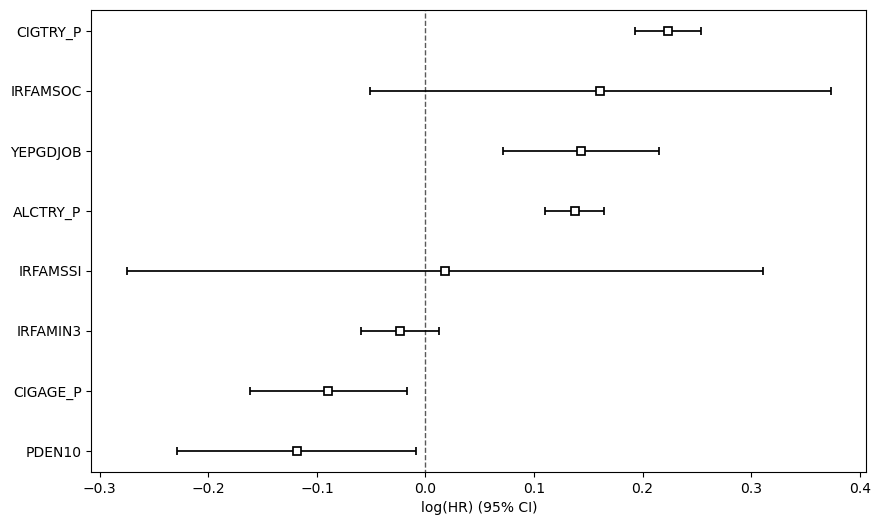

In [16]:
plt.subplots(figsize = (10, 6))
cph.plot()
plt.savefig("LogHRFirstCoxPHModel.pdf", bbox_inches='tight')

## Partial Effect on outcome

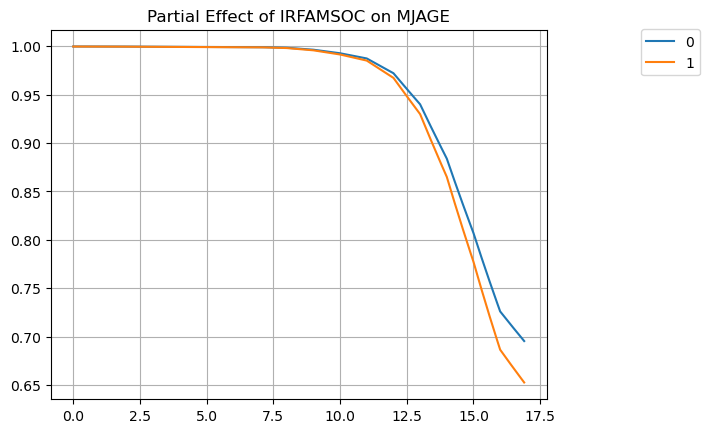

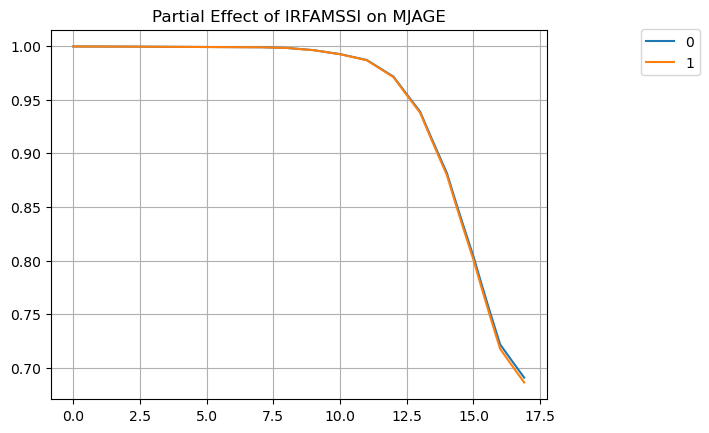

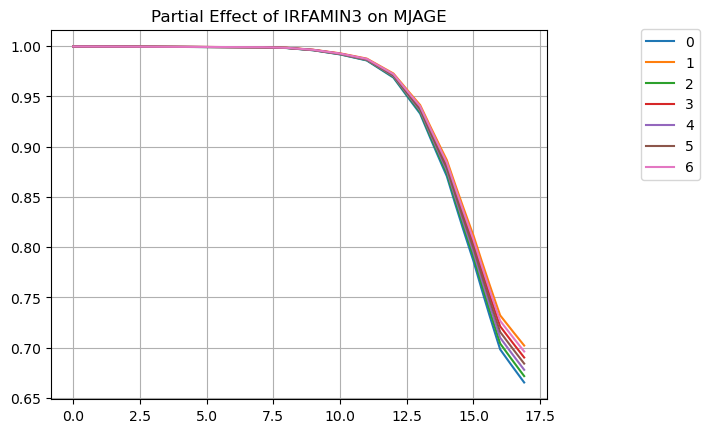

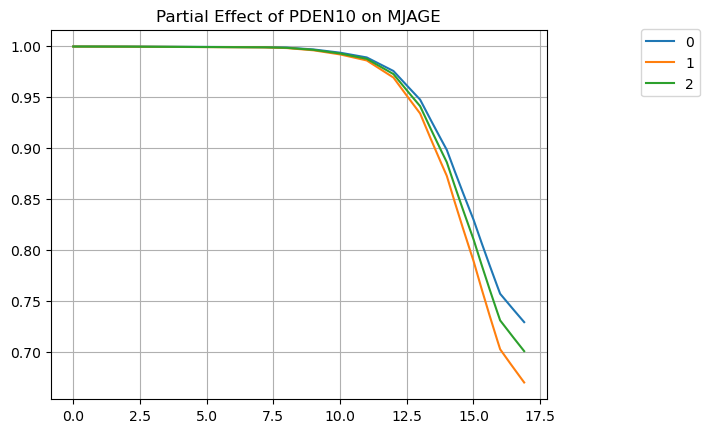

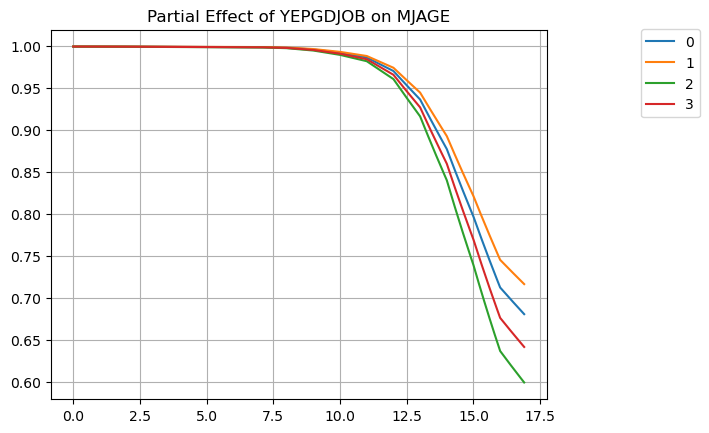

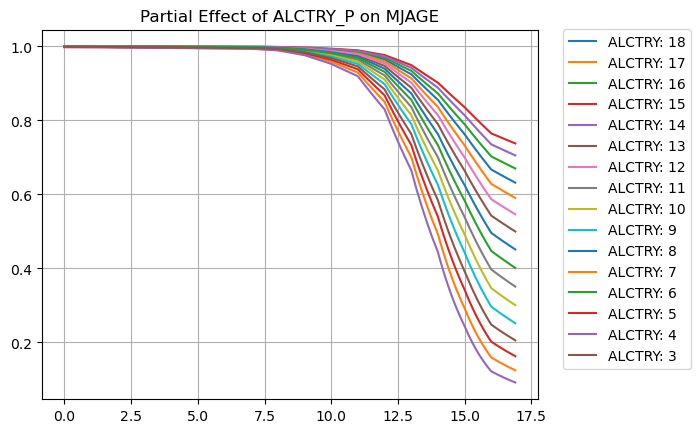

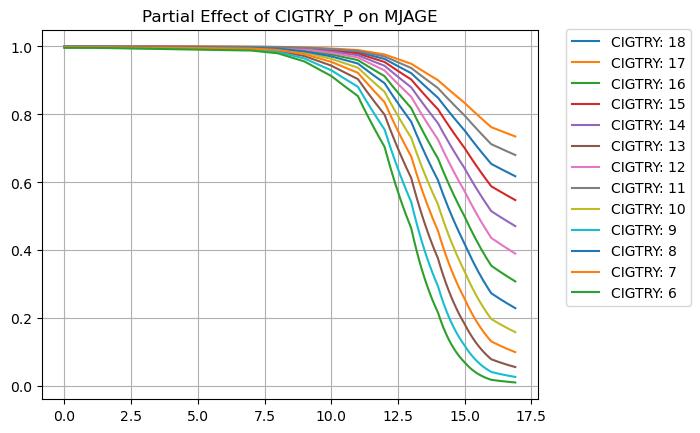

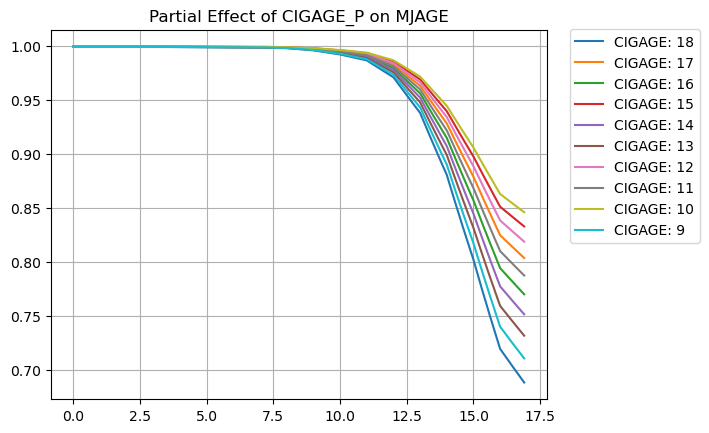

In [17]:
for cc in [c for c in cph_cols if not (any([x in c for x in ['MJAGE', '*']]))]:
    partial_effect_covariate = cc
    values_to_plot = df[cc].unique()
    otherColumns = [c for c in cph_cols if not "MJAGE" in c]

    # create a new dataframe with 5 rows containing the mean of each column
    df_part_outcome = pd.DataFrame([df[otherColumns].mean()] * len(values_to_plot))
    df_part_outcome[partial_effect_covariate] = values_to_plot

    X = np.arange(0,17,0.1)
    df_predicted_outcome = cph.predict_survival_function(df_part_outcome,times=X)

    fig,ax = plt.subplots()
    if '_P' in cc:
        labels = [f"{cc[:-2]}: {18-a}" for a in df_predicted_outcome.columns]
    else:
        labels = df_predicted_outcome.columns

    ax.plot(df_predicted_outcome,label=labels)
    ax.set_title(f"Partial Effect of {partial_effect_covariate} on MJAGE")
    fig.legend(bbox_to_anchor=(1.15, 0.895))
    plt.grid()
    fig.savefig(f"PartialEffect_{cc}.pdf", bbox_inches='tight')

## Check Assumption

<AxesSubplot:xlabel='log(HR) (95% CI)'>

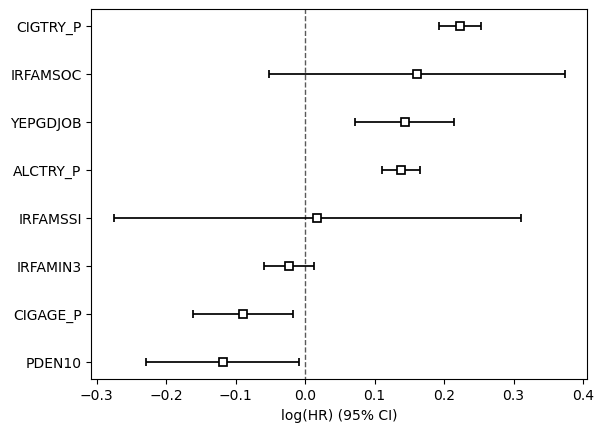

In [18]:
cph.plot()

In [19]:
t = cph.check_assumptions(df[cph_cols], p_value_threshold = 0.0500)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2260 total observations, 1467 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic    p  -log2(p)
ALCTRY_P km              7.57 0.01      7.40
         rank            6.31 0.01      6.38
CIGAGE_P km              0.01 0.92      0.12
         rank            0.12 0.73      0.45
CIGTRY_P km              3.84 0.05      4.32
         rank            2.66 0.10      3.28
IRFAMIN3 km              4.04 0.04      4.49
         rank            3.03 0.08      3.61
IRFAMSOC km              1.86 0.17      2.54
         rank            1.48 0.22      2.16
IRFAMSSI km              0.15 0.69      0.53
         rank            0.28 0.59      0.75
PDEN10   km              0.75 0.39      1.38
         rank            1.07 0.30      1.73
YEPGDJOB km              0.01 0.93      0.11
         rank            0.07 0.79      0.34



1. Variable 'IRFAMIN3' failed the non-proportional test: p-value is 0.0445.

   Advice 1: the functional form of the variable 'IRFAMIN3' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'IRFAMIN3' using pd.cut, and then specify it in
`strata=['IRFAMIN3', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'ALCTRY_P' failed the non-proportional test: p-value is 0.0059.

   Advice 1: the functional form of the variable 'ALCTRY_P' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

### Visual Check Assumptions

##### By Log-Log (Categorical)

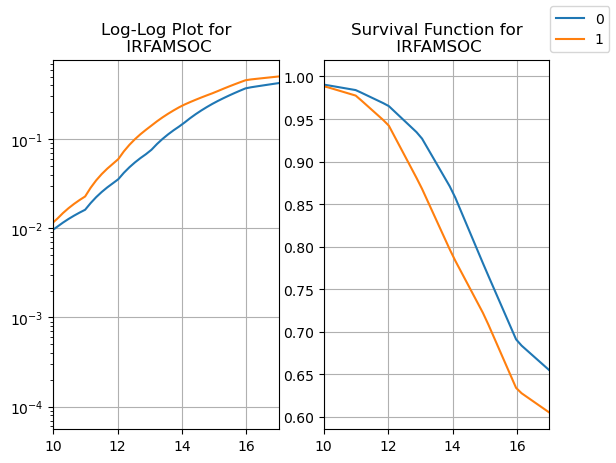

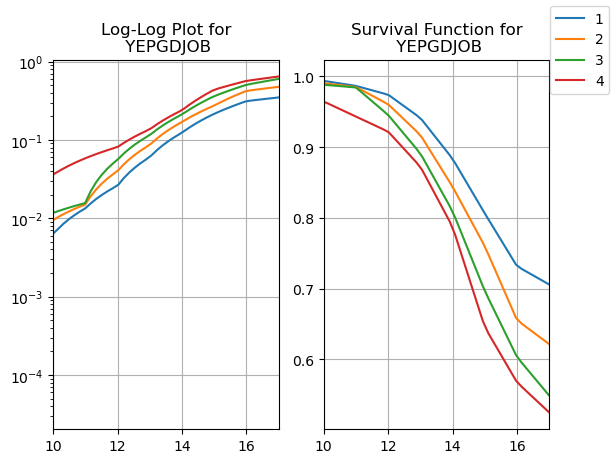

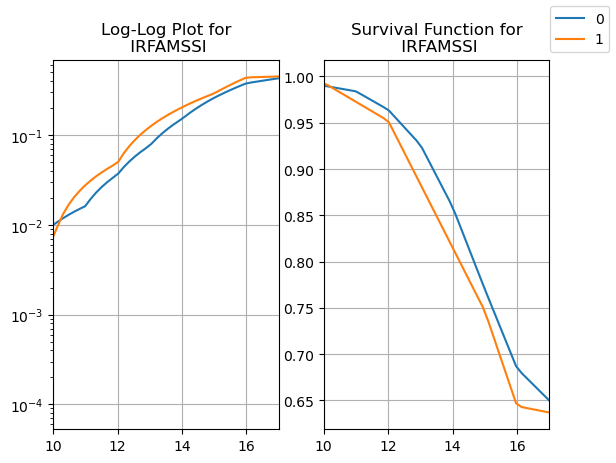

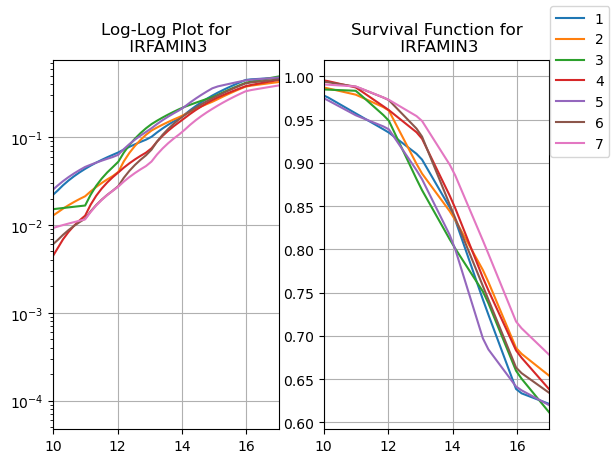

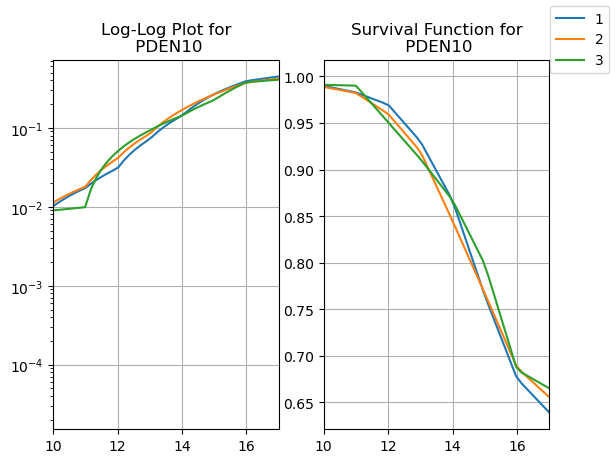

In [20]:
cat_cols = ['IRFAMSOC', 'YEPGDJOB', 'IRFAMSSI', 'IRFAMIN3', 'PDEN10']
for c in cat_cols:
    fig, ax = plt.subplots(1,2)
    for n,g in df.groupby(c):
        dur = g.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
        event_obs = g.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
        kmf = KaplanMeierFitter()
        kmf.fit(durations=dur, event_observed=event_obs)
        X = np.linspace(0,17,100)
        Y = kmf.predict(X, interpolate=True)
        Y_mlog = -np.log(Y)
        ax[0].plot(X,Y_mlog, label=n)
        #ax[0].set_xscale('log')
        ax[0].set_yscale('log')
        ax[1].plot(X,Y)
    ax[0].set_title(f"Log-Log Plot for\n {c}")
    ax[0].grid(visible=True, which='major')
    ax[1].set_title(f"Survival Function for\n {c}")
    ax[1].grid(visible=True, which='major')
    for axi in ax:
        axi.set_xlim([10,17])
    fig.legend()
    plt.show()
    
    fig.savefig(f"coxloglog_{c}.pdf", bbox_inches='tight')


#### Redesign of IRFAMIN3

COLUMN IRFAMIN3


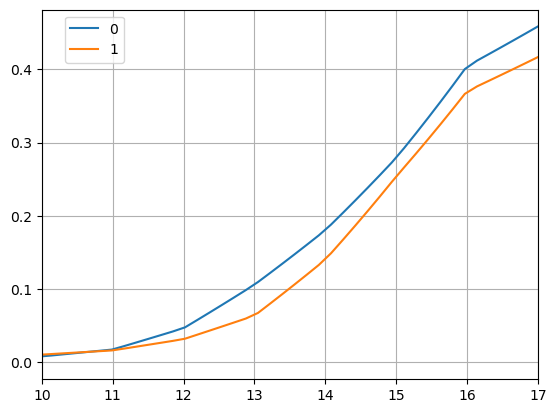

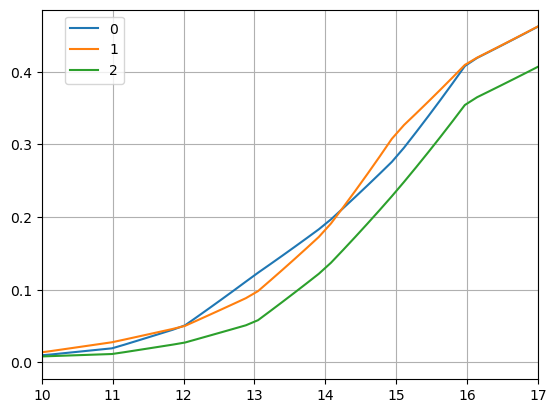

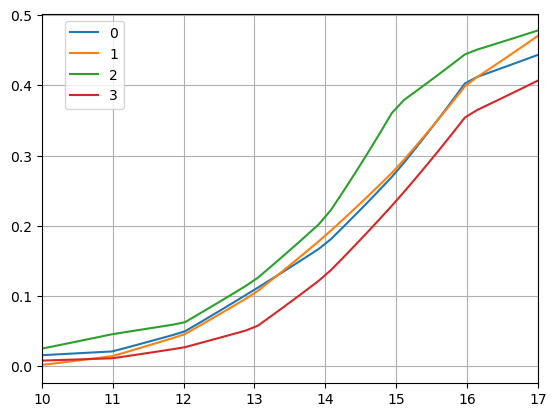

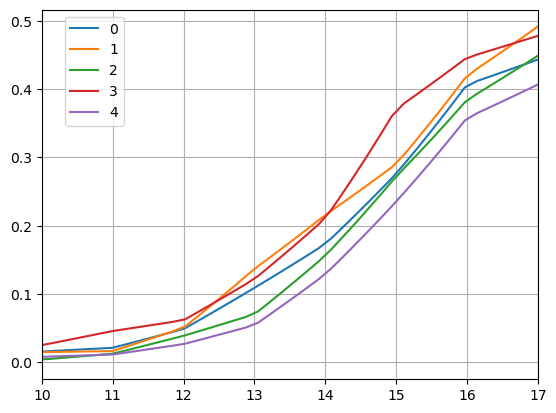

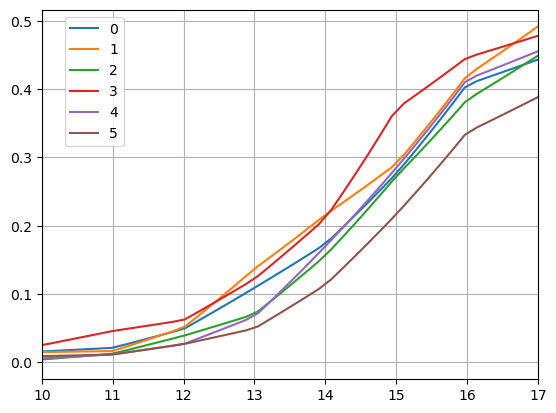

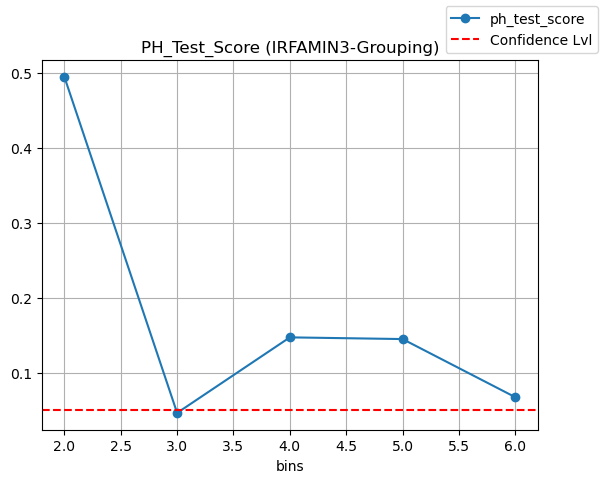

COLUMN ALCTRY_P


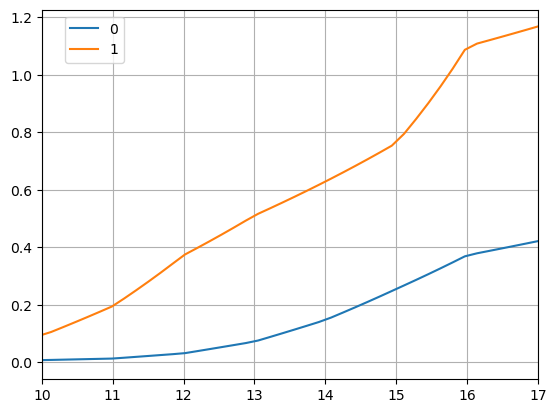

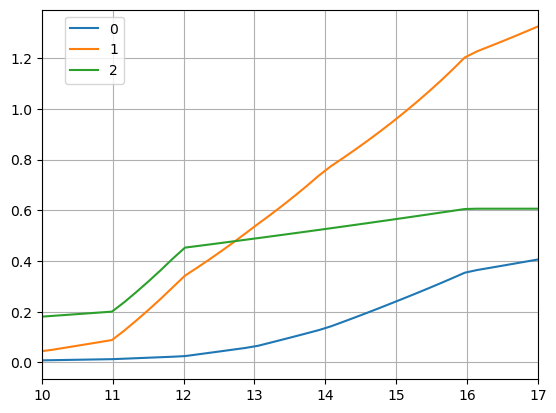

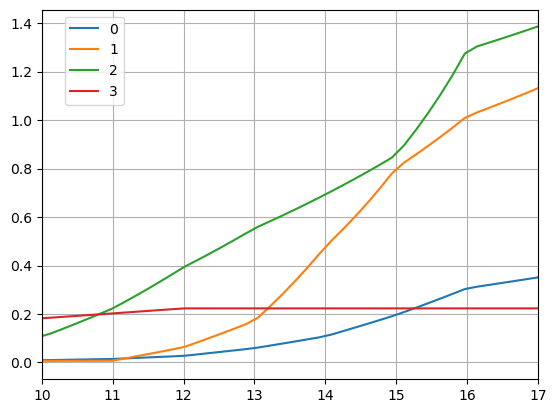

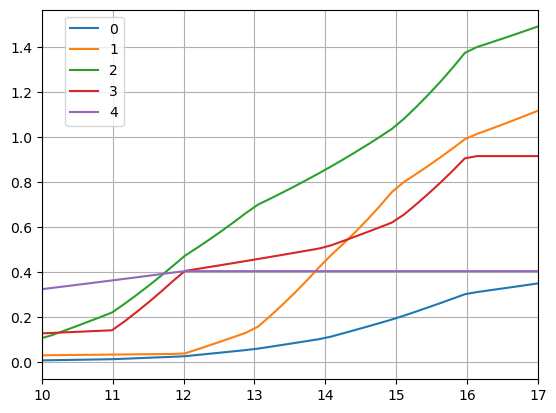

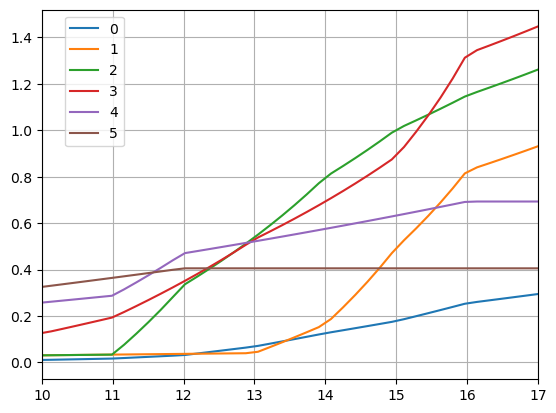

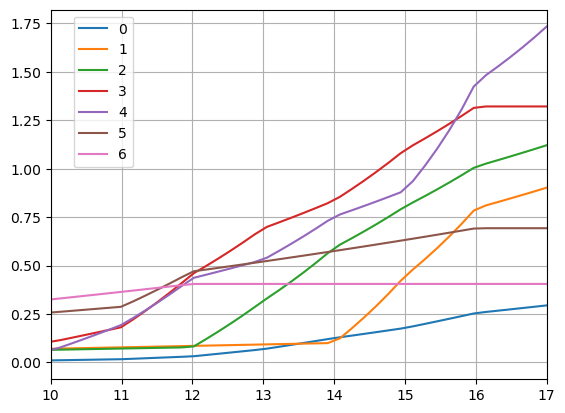

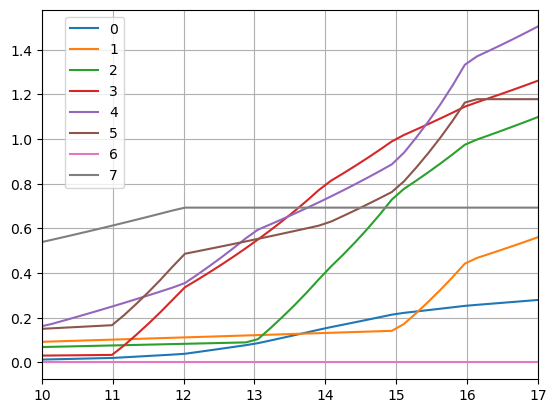

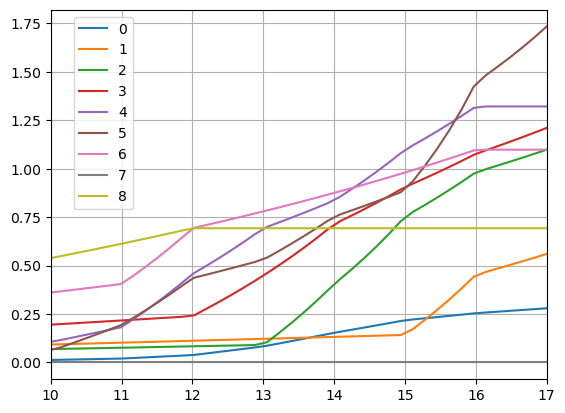

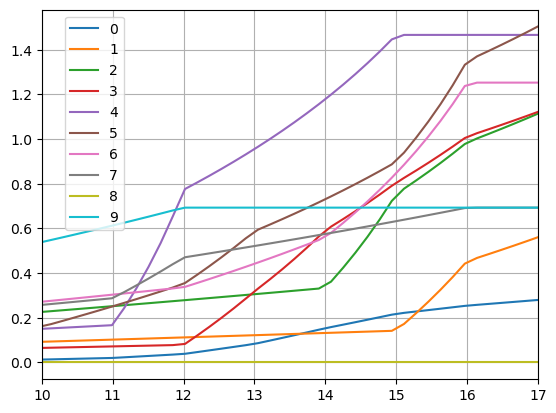

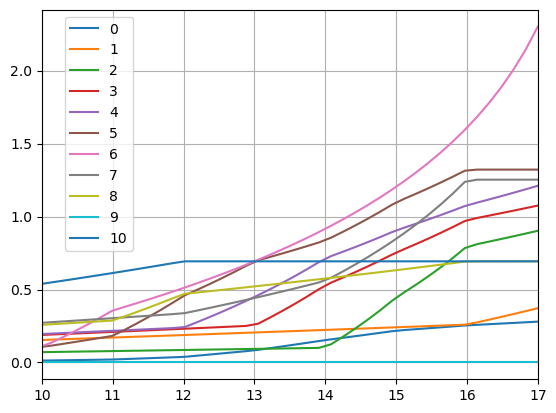

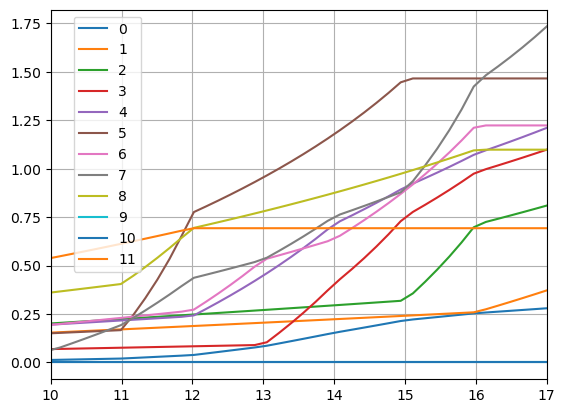

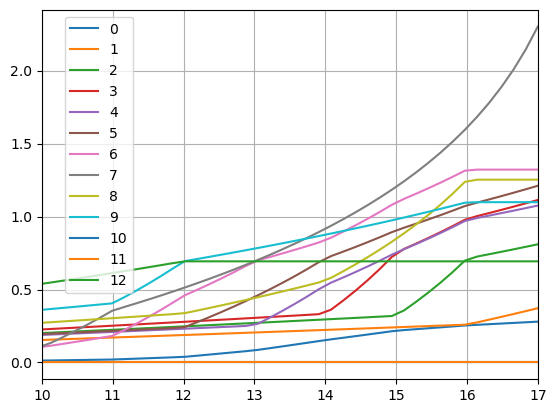

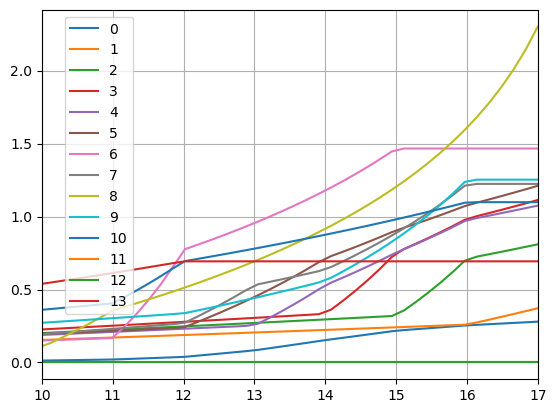

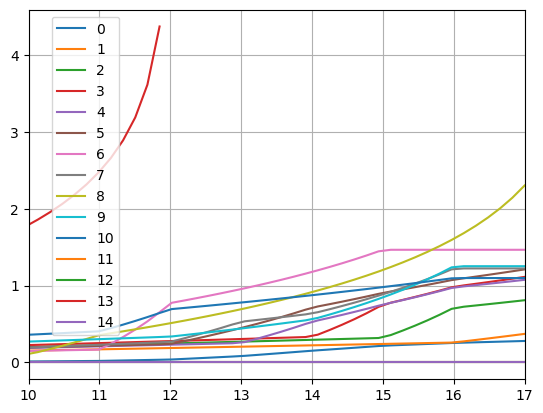

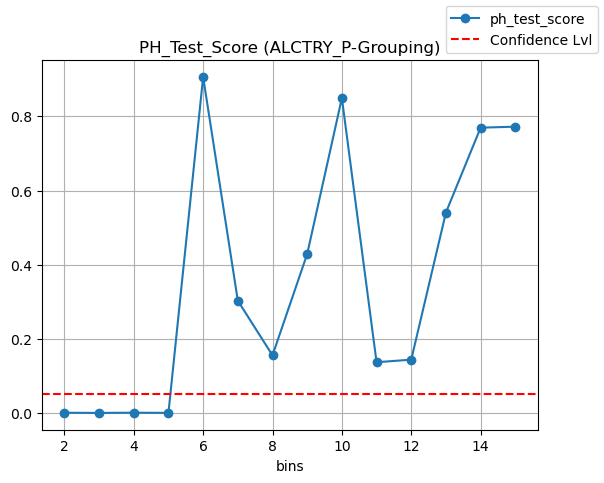

COLUMN CIGTRY_P


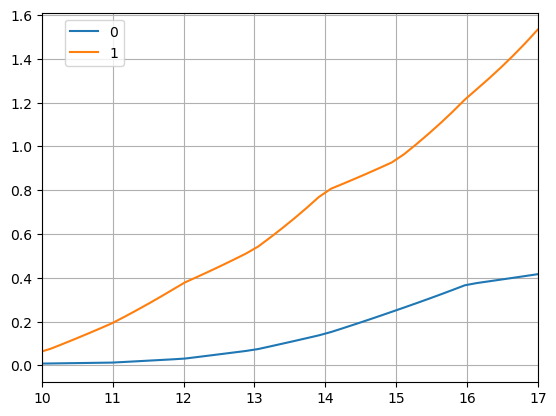

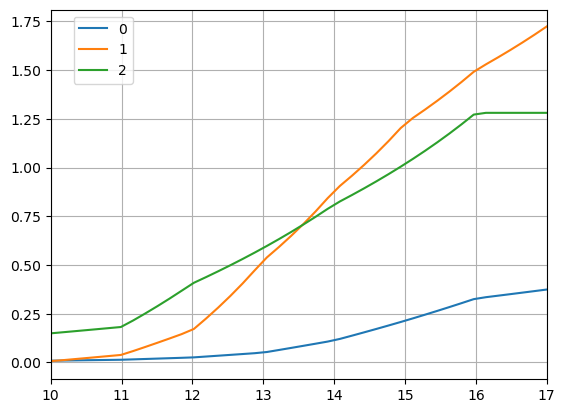

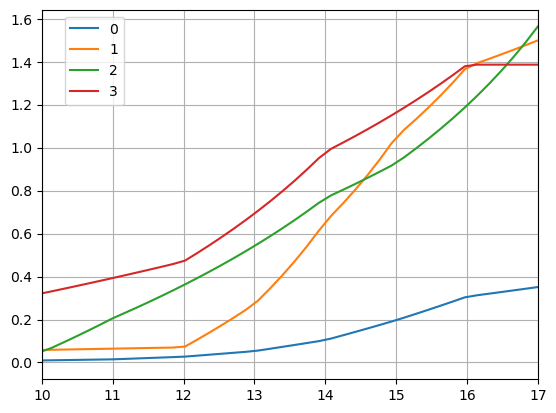

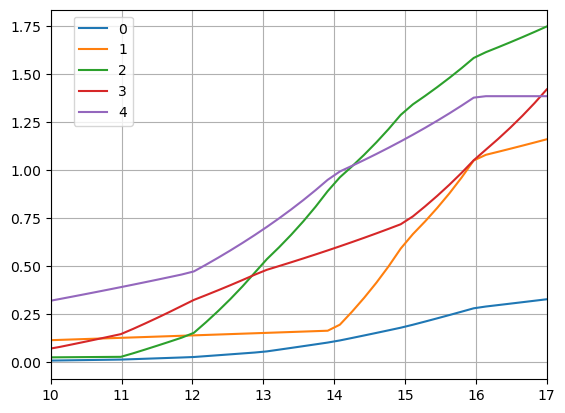

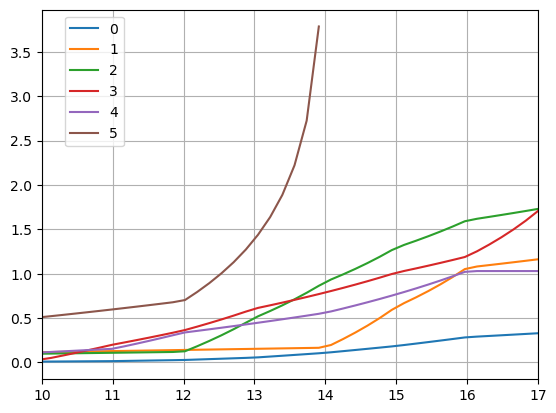

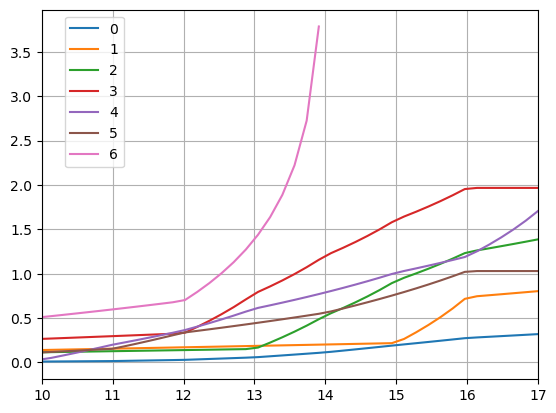

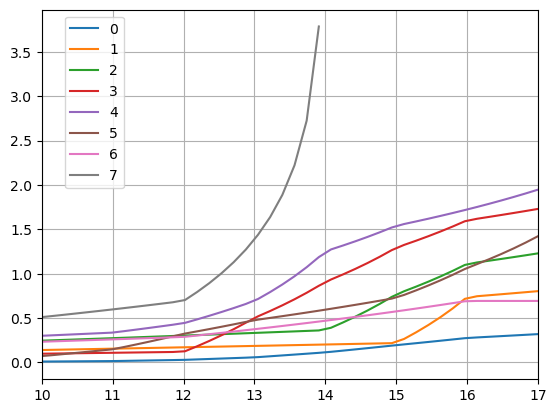

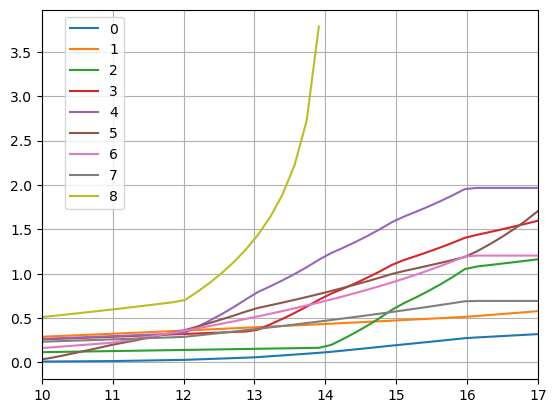

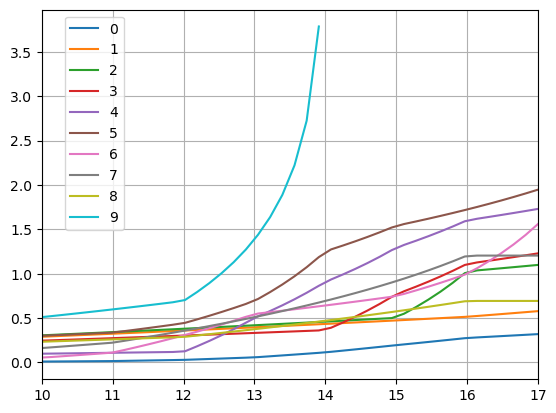

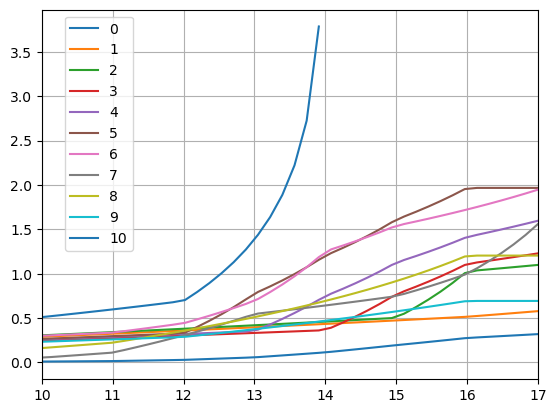

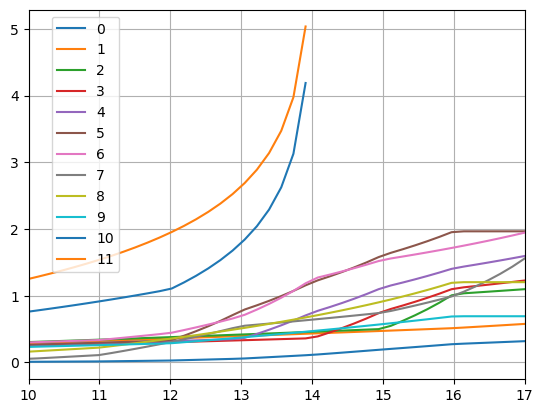

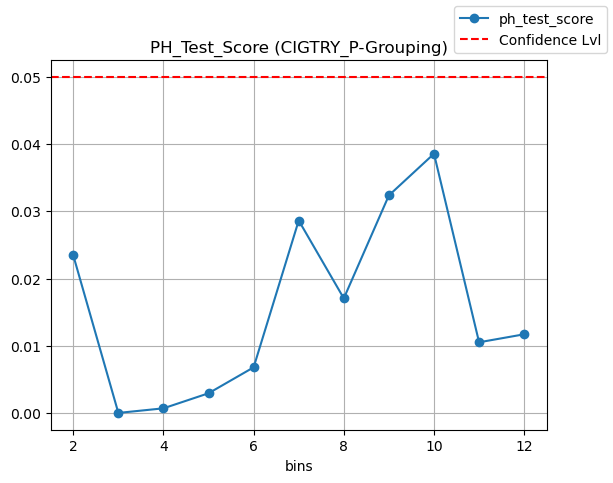

In [21]:
from lifelines.statistics import proportional_hazard_test

res_list= []
for redesign_col in ['IRFAMIN3', 'ALCTRY_P', 'CIGTRY_P']:
    print(f"COLUMN {redesign_col}")
    grp_col_name = redesign_col + 'Grpd'
    for no_bins in range(2,len(df[redesign_col].unique())):
        df[grp_col_name] = pd.cut(df[redesign_col], bins=no_bins, labels = np.arange(no_bins))
        df_clean = df.drop(redesign_col,inplace=False,axis=1)
        fig, ax = plt.subplots()
        for n,g in df_clean.groupby(grp_col_name):
            dur = g.apply(lambda x: x['MJAGE'] if not np.isnan(x['MJAGE']) else x['AGE'],axis=1)
            event_obs = g.apply(lambda x: 1 if not np.isnan(x['MJAGE']) else 0,axis=1)
            kmf = KaplanMeierFitter()
            kmf.fit(durations=dur, event_observed=event_obs)
            X = np.linspace(0,17,100)
            Y = kmf.predict(X, interpolate=True)
            Y_mlog = -np.log(Y)
            ax.plot(X,Y_mlog, label=n)
            #ax.set_yscale('log')
            #ax.plot(X,Y)
        #ax[0].set_title(f"Log-Log Plot for\n {'IRFAMIN3Grpd'}")
        ax.grid(visible=True, which='major')
        #ax[1].set_title(f"Survival Function for\n {'IRFAMIN3Grpd'}")
        #ax[1].grid(visible=True, which='major')
        ax.set_xlim([10,17])
        fig.legend(loc='upper left', bbox_to_anchor=(0.15,0.88))
        fig.savefig(f"{redesign_col}_binned_into_{no_bins}.pdf", bbox_inches='tight')
        plt.show()

        cphs = CoxPHFitter()
        df_clean_sc = df_clean[[c for c in cph_cols if not c == redesign_col] + [grp_col_name]]
        cphs.fit(df_clean_sc, duration_col='MJAGE_DUR', event_col='MJAGE_OBS')
        results = proportional_hazard_test(cphs,df_clean_sc , time_transform='rank')
        results_df = pd.DataFrame(results.p_value, index=results.name)
        res_list.append({'col' : redesign_col,'bins' : no_bins,'ph_test_score':results_df[0][grp_col_name]})

    res_list_df = pd.DataFrame(res_list)
    fig, ax = plt.subplots()
    res_list_df[res_list_df['col'] == redesign_col].plot(x='bins',y='ph_test_score',ax=ax,linestyle=None, marker='o',legend=False)
    ax.set_title(f"PH_Test_Score ({redesign_col}-Grouping)")
    ax.grid(True)
    ax.axhline(0.05,color = 'r', linestyle = '--', label='Confidence Lvl')
    fig.legend()
    fig.savefig(f"{redesign_col}_binning_pval.pdf", bbox_inches='tight')
    
    plt.show()


# Accelerated Failure Time (AFT)

"The parametric AFT model assumes that survival function that derived from say two population (for example P and Q) are related by some acceleration factor lambda (λ), which can be modelled as a function of covariates."

https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d

### Finding the best distribution

(The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data.)

__AIC is a measure of error__

In [22]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = df["MJAGE_DUR"], event_observed = df["MJAGE_OBS"])
    # Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 5850.261090145339
The AIC value for ExponentialFitter is 7661.7028272087555
The AIC value for LogNormalFitter is 5926.592646068468
The AIC value for LogLogisticFitter is 5835.2629348391865


The AIC value for WeibullFitter is 5850.261090145339
The AIC value for ExponentialFitter is 7661.7028272087555
The AIC value for LogNormalFitter is 5926.592646068468
The AIC value for LogLogisticFitter is 5835.2629348391865
The AIC value for PiecewiseExponentialFitter is 7665.698881081052
The AIC value for GeneralizedGammaFitter is 5843.186319516861
The AIC value for SplineFitter is 5843.1035079633475


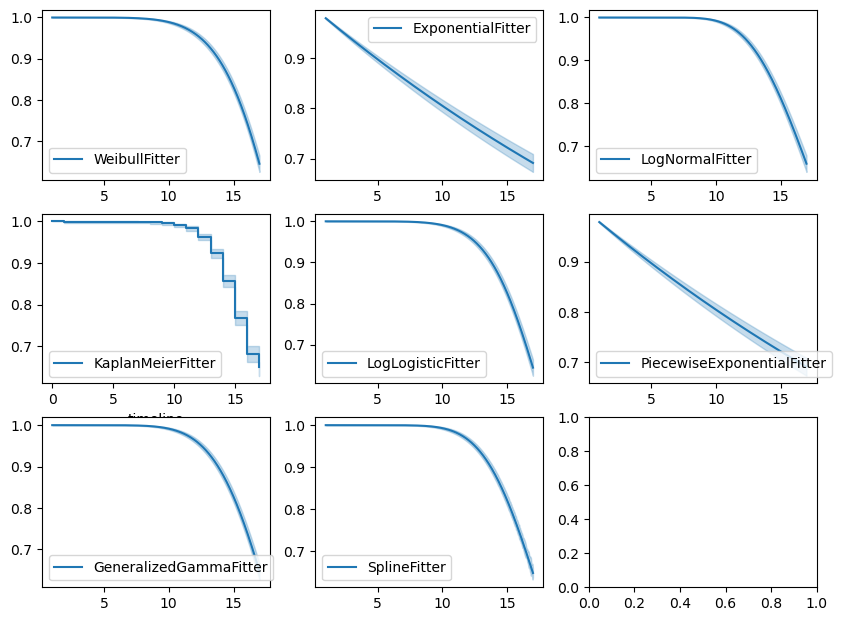

In [23]:
from lifelines import KaplanMeierFitter, WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter, PiecewiseExponentialFitter, GeneralizedGammaFitter, SplineFitter

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5)) 
T = df["MJAGE_DUR"]
E = df["MJAGE_OBS"]
kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter') 
wbf = WeibullFitter().fit(T, E, label='WeibullFitter') 
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter') 
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter') 
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter') 
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter') 
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter') 
spf = SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter') 

wbf.plot_survival_function(ax=axes[0][0]) 
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
gg.plot_survival_function(ax=axes[2][0]) 
spf.plot_survival_function(ax=axes[2][1])

fig.savefig("parametric_fits_models.pdf", bbox_inches='tight')

for model in [wbf,exf ,lnf ,llf ,pwf ,gg ,spf ]:
    model.fit(durations = df["MJAGE_DUR"], event_observed = df["MJAGE_OBS"])
    # Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

__Gode forklaringer på koefficienterne findes på: https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d__

<lifelines.WeibullAFTFitter: fitted with 2260 total observations, 1467 right-censored observations>
             duration col = 'MJAGE_DUR'
                event col = 'MJAGE_OBS'
   number of observations = 2260
number of events observed = 793
           log-likelihood = -2722.572
         time fit was run = 2023-04-11 08:00:18 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ ALCTRY_P  -0.018      0.982      0.002           -0.022           -0.015                0.978                0.985
        CIGAGE_P   0.012      1.012      0.005            0.002            0.021                1.002                1.021
        CIGTRY_P  -0.030      0.971      0.002           -0.034           -0.026                0.966                0.975
        IRFAMIN3   0.003      1.003      0.002           -0.002            0.008                0.998                1.008
        IRFAMSOC  -0.022      0.978      0.015           -0.050            0.007                0.951                1.007
        IRFAMSSI  -0.003      0.997      0.020           -0.043            0.036                0.958                1.037
        PDEN10     0.016      1.016      0.008            0.001            0.030                1.001                1.031
        YEPGDJOB  -0.019      0.981      0.005           -0.029           -0.010                0.971                0.990
        Intercept  2.999     20.075      0.022            2.957            3.042               19.231               20.956
rho_    Intercept  2.008      7.445      0.032            1.944            2.071                6.988                7.932

                    cmp to       z       p   -log2(p)
param   covariate                                    
lambda_ ALCTRY_P     0.000  -9.496 <0.0005     68.639
        CIGAGE_P     0.000   2.349   0.019      5.731
        CIGTRY_P     0.000 -13.636 <0.0005    138.227
        IRFAMIN3     0.000   1.201   0.230      2.123
        IRFAMSOC     0.000  -1.494   0.135      2.888
        IRFAMSSI     0.000  -0.157   0.875      0.193
        PDEN10       0.000   2.078   0.038      4.727
        YEPGDJOB     0.000  -3.928 <0.0005     13.510
        Intercept    0.000 136.825 <0.0005        inf
rho_    Intercept    0.000  62.079 <0.0005        inf
---
Concordance = 0.716
AIC = 5465.144
log-likelihood ratio test = 401.117 on 8 df
-log2(p) of ll-ratio test = 268.965

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

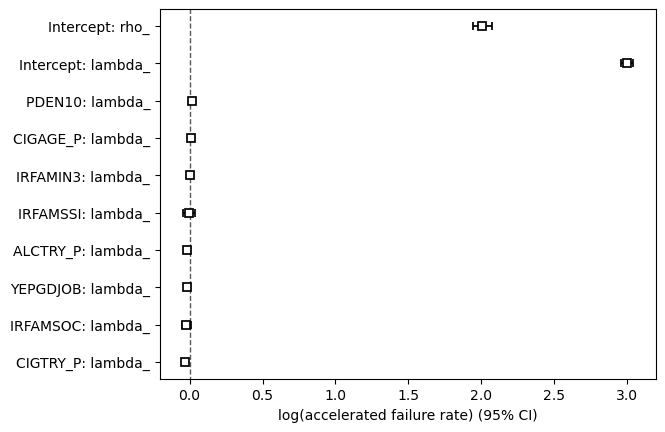

In [24]:
from lifelines import WeibullAFTFitter

weibull_aft = WeibullAFTFitter()
weibull_aft.fit(df[cph_cols], duration_col='MJAGE_DUR', event_col='MJAGE_OBS')

weibull_aft.print_summary(3)
weibull_aft.plot()

# Machine Learning Models Fit

Bruge Random Survival Forest: https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full / https://scikit-survival.readthedocs.io/en/stable/user_guide/random-survival-forest.html

Bruge XGBoost: https://ieeexplore.ieee.org/document/9794670

## Random Survival Forest

In [25]:
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

random_state = 20

X = df[cph_cols].drop(['MJAGE_DUR', 'MJAGE_OBS'], axis=1)
y_raw = df[['MJAGE_OBS', 'MJAGE_DUR']].values
y = np.array([tuple(row) for row in y_raw], dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
X_train_rsf, X_test_rsf, y_train_rsf, y_test_rsf = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [26]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train_rsf, y_train_rsf)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20)

In [29]:
print(f"Concordance index: {rsf.score(X_test_rsf, y_test_rsf)}")

Concordance index: 0.7116338292454094


In [31]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rsf, X_test_rsf, y_test_rsf, n_repeats=15, random_state=random_state)

In [33]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test_rsf.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
CIGTRY_P,0.099253,0.011257
ALCTRY_P,0.069563,0.009987
YEPGDJOB,0.013557,0.007040
IRFAMIN3,0.004917,0.004274
CIGAGE_P,0.001193,0.002255
IRFAMSOC,0.000518,0.002104
PDEN10,-0.000432,0.004575
IRFAMSSI,-0.001388,0.002264


## XGBoost

https://www.kaggle.com/code/nbuhagiar/predicting-survival-with-xgboost/notebook

In [34]:
# importing dataset from pycox package
from pycox.datasets import metabric

# importing model and utils from xgbse
from xgbse import XGBSEKaplanNeighbors
from xgbse.converters import convert_to_structured

y = convert_to_structured(df['MJAGE_DUR'], df['MJAGE_OBS'])
X = df[cph_cols].drop(['MJAGE_DUR', 'MJAGE_OBS'], axis=1)
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [35]:
# fitting xgbse model
xgbse_model = XGBSEKaplanNeighbors(n_neighbors=10)
xgbse_model.fit(X_train_xg, y_train_xg)

XGBSEKaplanNeighbors(n_neighbors=10,
                     xgb_params={'aft_loss_distribution': 'normal',
                                 'aft_loss_distribution_scale': 1,
                                 'booster': 'dart', 'colsample_bynode': 0.5,
                                 'eval_metric': 'aft-nloglik',
                                 'learning_rate': 0.05, 'max_depth': 8,
                                 'min_child_weight': 50,
                                 'objective': 'survival:aft', 'subsample': 0.5,
                                 'tree_method': 'hist'})

In [36]:
from xgbse.metrics import concordance_index, approx_brier_score, dist_calibration_score

# predicting
y_pred = xgbse_model.predict(X_test_xg)

In [37]:
print(f'C-index: {concordance_index(y_test_xg, y_pred)}')

C-index: 0.6825114790933958


# Final Evaluation

### Confussion Matrix (How many survived and how many was predicted to survive)

In [147]:
cph = CoxPHFitter()
df_train, df_test,_,_ = train_test_split(df[cph_cols],y,test_size=0.25, random_state=random_state)
cph.fit(df_train, duration_col = 'MJAGE_DUR', event_col = 'MJAGE_OBS')

y_test_obs = np.invert(df_test['MJAGE_OBS'].values.astype(np.bool_))
y_pred_1 = cph.predict_expectation(df_test)
y_pred_2 = cph.predict_median(df_test).copy()
y_test = df_test['MJAGE_DUR'].copy()

In [80]:
y_pred_class = y_pred_2 >= 17
y_test_class = y_test >= 17

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print(f"Accuracy: \t{accuracy_score(y_test_class, y_pred_class)}")
print(f"Precision: \t{precision_score(y_test_class, y_pred_class)}")
print(f"Recall: \t{recall_score(y_test_class, y_pred_class)}")
print(f"F1: \t\t{f1_score(y_test_class, y_pred_class)}")

Confusion Matrix:
[[ 47 133]
 [ 19 366]]
Accuracy: 	0.7309734513274336
Precision: 	0.7334669338677354
Recall: 	0.9506493506493506
F1: 		0.8280542986425339


### Those that started, how precise were they predicted?

In [166]:
agesGuessed = []

y_pred_2[y_pred_2 >= np.inf] = np.inf
y_test[y_test >= 17] = np.inf

for tol in np.arange(0,100,0.1):
    withinTol = sum(abs(y_test-y_pred_2) <= tol)
    agesGuessed.append({'tol' : tol, 'sum' : withinTol})

In [167]:
agesGuessed

[{'tol': 0.0, 'sum': 6},
 {'tol': 0.1, 'sum': 6},
 {'tol': 0.2, 'sum': 6},
 {'tol': 0.30000000000000004, 'sum': 6},
 {'tol': 0.4, 'sum': 6},
 {'tol': 0.5, 'sum': 6},
 {'tol': 0.6000000000000001, 'sum': 6},
 {'tol': 0.7000000000000001, 'sum': 6},
 {'tol': 0.8, 'sum': 6},
 {'tol': 0.9, 'sum': 6},
 {'tol': 1.0, 'sum': 28},
 {'tol': 1.1, 'sum': 28},
 {'tol': 1.2000000000000002, 'sum': 28},
 {'tol': 1.3, 'sum': 28},
 {'tol': 1.4000000000000001, 'sum': 28},
 {'tol': 1.5, 'sum': 28},
 {'tol': 1.6, 'sum': 28},
 {'tol': 1.7000000000000002, 'sum': 28},
 {'tol': 1.8, 'sum': 28},
 {'tol': 1.9000000000000001, 'sum': 28},
 {'tol': 2.0, 'sum': 41},
 {'tol': 2.1, 'sum': 41},
 {'tol': 2.2, 'sum': 41},
 {'tol': 2.3000000000000003, 'sum': 41},
 {'tol': 2.4000000000000004, 'sum': 41},
 {'tol': 2.5, 'sum': 41},
 {'tol': 2.6, 'sum': 41},
 {'tol': 2.7, 'sum': 41},
 {'tol': 2.8000000000000003, 'sum': 41},
 {'tol': 2.9000000000000004, 'sum': 41},
 {'tol': 3.0, 'sum': 49},
 {'tol': 3.1, 'sum': 49},
 {'tol': 3.2

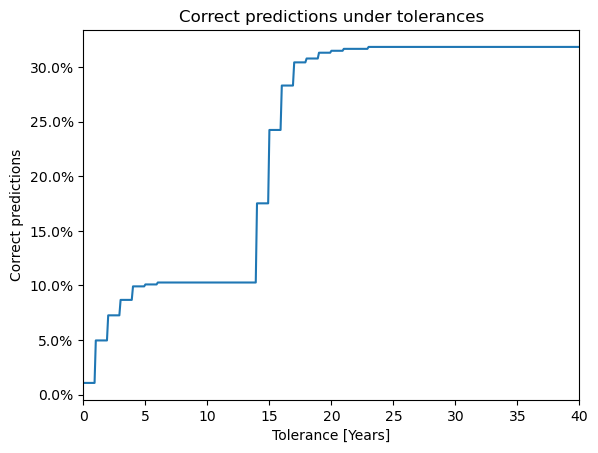

In [182]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()
ax.plot([d['tol'] for d in agesGuessed], [(d['sum']/len(y_test))*100 for d in agesGuessed], label="Correct predictions")
ax.set_xlabel('Tolerance [Years]')
ax.set_ylabel('Correct predictions')
ax.set_title("Correct predictions under tolerances")
ax.set_xlim([0,40])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.savefig("figs//CorrectPredictionsTolerance.pdf", format="pdf", bbox_inches="tight")